# *DATA SCIENCE / SECTION 1 / PROJECT*



# 🏆 프로젝트 목표


> 다음 분기 설계할 게임 분석

#  🕹️ Data Description

*   `Name` : 게임 이름
*   `Platform` : 게임이 지원되는 플랫폼의 이름
*   `Year` : 게임 출시 연도 (1980-2020년)
*   `Genre` : 게임의 장르
*   `Publisher` : 게임을 제작한 회사
*   `NA_Sales` : 북미지역 출고량 (단위 :백만)
*   `EU_Sales` : 유럽지역에서의 출고량 (단위 :백만)
*   `JP_Sales` : 일본지역에서의 출고량 (단위 :백만)
*   `Other_Sales `: 기타지역 출고량 (단위 :백만)

#  데이터 탐색




## **1. Gathering Data**

In [1]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment',  None) #warning sign 무시하기

!sudo apt-get install -y fonts-nanum  #한글폰트 다운
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
#데이터셋 불러오기
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## **2. 데이터 탐색 및 정제**

In [3]:
#불필요한 행 제거
df = df.iloc[:,1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
#결측치, 데이터타입 확인
#year, genre, publisher에 결측치 존재하고, 출고량과 year의 데이터타입 변경 필요.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
#분석하기 쉽게 연도,이름순으로 정렬.
df.sort_values(by=['Year','Name'],ascending=True,inplace=True)

In [6]:
#'Name'이 고유한지 확인하기 위해 이름의 중복치에 대해 이름과 연도를 기준으로 정렬
#같은 이름이어도 여러 플랫폼이 존재함.

df[df.duplicated(['Name'],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8144,ESPN NFL Primetime 2002,XB,2.0,Sports,Konami Digital Entertainment,0.01,0,0,0
11163,Momotarou Dentetsu 11,GC,2.0,Misc,Hudson Soft,0,0,0.07,0
15612,Rally Fusion: Race of Champions,PS2,2.0,Racing,Activision,0.06,0.05,0,0.02
8765,Disney's Aladdin,GBA,3.0,Platform,Capcom,0.02,0.01,0,0
...,...,...,...,...,...,...,...,...,...
6118,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0,0.12
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
15776,Without Warning,XB,NaN,Shooter,Capcom,0.01,0,0,0


In [7]:
df[df.duplicated(['Name','Platform'],keep=False)]

# 같은 이름의 게임이어도 출시 년도가 다를 수 있음. (예를들면 재출시 하는 경우)
#그에 따라 'Year'은 대체가 불가능 하다고 판단됨.
#출고량에 단위가 'K'인것 발견

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
15705,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [8]:
# Year 결측치들 제거
df.dropna(subset=['Year'],inplace=True)

In [9]:
#'Year'가 1900미만인 데이터 삭제.
df= df[df['Year'] > 1900]

In [10]:
#Genre의 결측치와 같은 게임이름의 데이터를 가진 다른 열이 있는지 확인
missing_G = df[df['Genre'].isnull()]
yes_G = df.copy()                       #원래 데이터를 복사해서 사용
yes_G = yes_G.dropna(subset=['Genre']) # 'Publisher'가 nan값인 행들만 제거!

have_G =[]
for data in yes_G['Name']:
    if data in missing_G['Name'].unique():
        have_G.append(data)

len(list(set(have_G)))  #20개의 데이터 대체 가능!

20

In [11]:
missing_G['Genre']  = missing_G['Name'].map(lambda x : yes_G.query('Name == "'+x+'"').Genre.iloc[0] if len(yes_G.query('Name == "'+x+'"')) > 0 else np.NaN)

In [12]:
missing_G.isnull().sum() #20개 대체완료.

Name            0
Platform        0
Year            0
Genre          30
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [13]:
#df에 해당 데이터 덮어씌우기

df.update(missing_G,overwrite=True)

In [14]:
#같은방법으로 'Publisher'확인 
missing_P = df[df['Publisher'].isnull()]
yes_P = df.copy()                       #원래 데이터를 복사해서 사용
yes_P = yes_P.dropna(subset=['Publisher']) # 'Publisher'가 nan값인 행들만 제거!

#기존데이터의 'Name'과 'Publisher'결측치의 'Name'이 같은 데이터가 있는지 확인.
have_P = []

for data in yes_P['Name']:           
    if data in missing_P['Name'].unique():
        have_P.append(data)
have_P                                #1개의 데이터 대체가능.

['Bound By Flame']

In [15]:
missing_P['Publisher']  = missing_P['Name'].map(lambda x : yes_P.query('Name == "'+x+'"').Publisher.iloc[0] if len(yes_P.query('Name == "'+x+'"')) > 0 else np.NaN)

In [16]:
df.update(missing_P,overwrite=True) #덮어쓰기

In [17]:
df.isnull().sum() 

Name            0
Platform        0
Year            0
Genre          30
Publisher      35
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [18]:
#결측치 삭제
df.dropna(inplace=True)

In [19]:
#'Name','Platform','Year' 이 같은 항목 삭제
df.drop_duplicates(['Name','Platform','Year'],keep=False,inplace=True)

In [20]:
df.reset_index(drop=True,inplace=True) #인덱스 재정렬.

In [21]:
#출고량에 숫자이외의 문자가 들어있는 항목 전부 뽑아내기.
import re                

def has_errors(inputString):
  return bool(re.search('[a-zA-Z]+', inputString))

error_condition = df.NA_Sales.apply(has_errors)|df.EU_Sales.apply(has_errors)|df.JP_Sales.apply(has_errors)|df.Other_Sales.apply(has_errors)
error= df[error_condition]

In [22]:
error

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0,0K
30,E.T.: The Extra Terrestrial,2600,1981.0,Action,Atari,1.84,110K,0,0.02
113,F1 Race,NES,1984.0,Racing,Nintendo,0,0,1.52,0K
129,Ice Climber,NES,1985.0,Platform,Nintendo,0.46M,0.1,0.92,0.02
146,Pro Yakyuu Family Stadium,NES,1986.0,Sports,Namco Bandai Games,0.15,0,2.05,0M
...,...,...,...,...,...,...,...,...,...
16075,Song of the Deep,PS4,2016.0,Action,Insomniac Games,0.05M,0,0,0.01
16108,The Idolmaster: Platinum Stars,PS4,2016.0,Simulation,Namco Bandai Games,0M,0,0.09,0
16121,Total War: WARHAMMER,PC,2016.0,Strategy,Sega,0M,0.1,0,0.01
16122,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,0.01M,0,0,0


In [23]:
#출고량에 'K'나 'M'등 문자로 이루어진 데이터 변환해줌.
#'M'은 원래 단위와 같으니 지워주고
# 'K'인 데이터는 *0.001 을 해준다.

Sales= ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in Sales:
  df[i] =df[i].replace({"K":"*0.001", "M":""}, regex=True).map(pd.eval).apply(lambda x:x*1000)


In [24]:
df[Sales]= df[Sales].astype(int)

In [25]:
#year 의 데이터 타입 정수로 바꿔주기.
df['Year']=df['Year'].astype(np.int64)

In [26]:
#이상치확인

df[Sales].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16160.000000,16160.000000,16160.000000,16160.000000
mean,265.101423,147.311634,77.863243,48.206002
std,822.107500,508.252357,306.601129,189.833501
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,80.000000,20.000000,0.000000,10.000000
75%,240.000000,110.000000,40.000000,40.000000
max,41490.000000,29020.000000,10220.000000,10570.000000


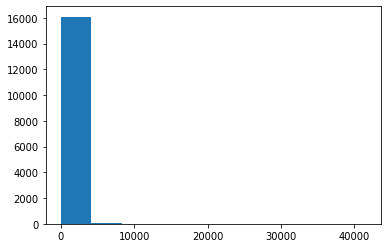

In [27]:
#히스토그램을 그려서 이상치를 확인해보자
plt.hist(df['NA_Sales']);

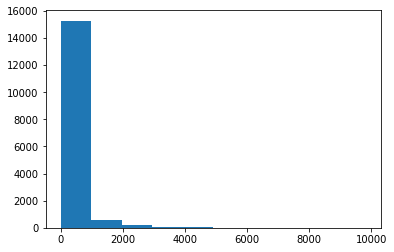

In [28]:
plt.hist(df['NA_Sales'][df['NA_Sales']<10000]);

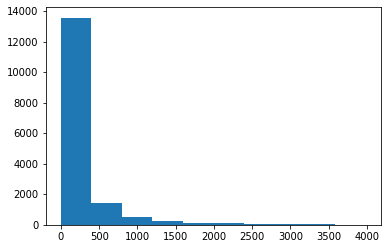

In [29]:
plt.hist(df['NA_Sales'][df['NA_Sales']<4000]);

In [30]:
len(df['NA_Sales'][df['NA_Sales']>=3000])/ len(df['NA_Sales'][df['NA_Sales']<3000])

0.008991008991008992

In [31]:
#3000이상인 부분이 아닌부분에 비해 0.89퍼센트 밖에 되지않으므로 삭제해줌.
df.drop(index = df[df.NA_Sales>=3000].index,inplace=True)

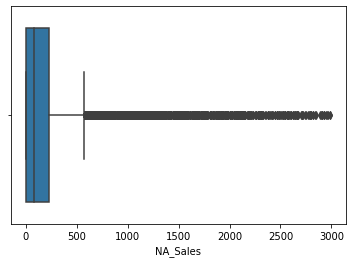

In [32]:
# 박스플롯을 그려보자
sns.boxplot(x=df.NA_Sales);

In [33]:
#500이상인 부분은 너무 많아서 지워주지 않는다.
len(df['NA_Sales'][df['NA_Sales']>=500]), len(df['NA_Sales'][df['NA_Sales']<500]) 

(1888, 14128)

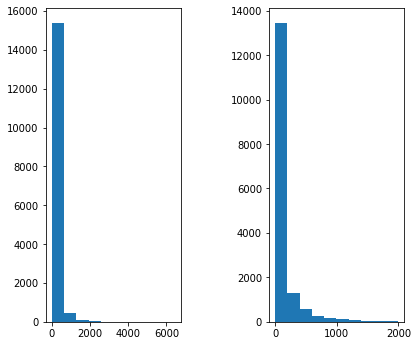

In [34]:
#동일한 과정을 세번 더 반복한다.
#유럽판매량 이상치제거
fig = plt.figure(figsize=(10,6))

plt.subplot(131)
ax1 = plt.hist(df['EU_Sales']); #EU의 히스토그램

plt.subplot(132)
ax2 = plt.hist(df['EU_Sales'][df['EU_Sales']<2000]); #EU 판매량 2000미만
fig.tight_layout(pad=5.0) #plot 간 간격설정

In [35]:
len(df['EU_Sales'][df['EU_Sales']>=2000])/ len(df['EU_Sales'][df['EU_Sales']<2000]) 

0.004326832633097135

In [36]:
#2000이상의 데이터는 0.4프로에 해당하며 지워줘도 된다고 판단했다.
df.drop(index = df[df.EU_Sales>=2000].index,inplace=True)

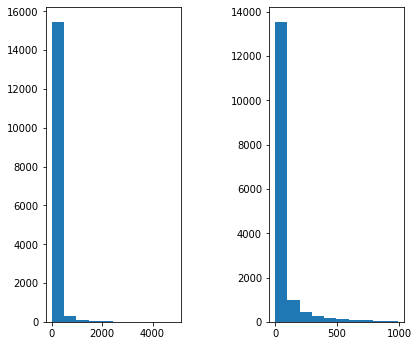

In [37]:
#일본판매량 이상치 제거
fig = plt.figure(figsize=(10,6))

plt.subplot(131)
ax1 = plt.hist(df['JP_Sales']); #JP의 히스토그램

plt.subplot(132)
ax2 = plt.hist(df['JP_Sales'][df['JP_Sales']<1000]); #JP 판매량 1000미만

fig.tight_layout(pad=5.0) #plot 간 간격설정

In [38]:
len(df['JP_Sales'][df['JP_Sales']>=1000])/ len(df['JP_Sales'][df['JP_Sales']<1000]) 

0.01096741473310511

In [39]:
#1000이상의 데이터는 1프로에 해당하며 지워줘도 된다고 판단했다.
df.drop(index = df[df.JP_Sales>=1000].index,inplace=True)

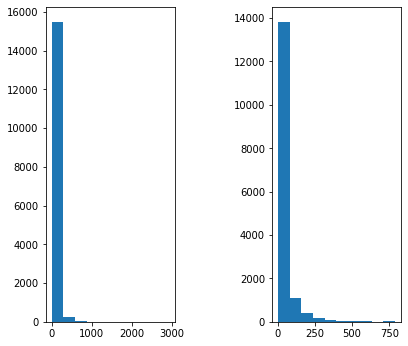

In [40]:
#기타국가 판매량 이상치 제거
fig = plt.figure(figsize=(10,6))

plt.subplot(131)
ax1 = plt.hist(df['Other_Sales']); #Other 의 히스토그램

plt.subplot(132)
ax2 = plt.hist(df['Other_Sales'][df['Other_Sales']<800]); #Other 판매량 800미만

fig.tight_layout(pad=5.0) #plot 간 간격설정

In [41]:
len(df['Other_Sales'][df['Other_Sales']>=800])/ len(df['Other_Sales'][df['Other_Sales']<800]) 

0.001651003302006604

In [42]:
#800이상의 데이터는 0.1프로에 해당하며 지워줘도 된다고 판단했다.
df.drop(index = df[df.Other_Sales>=800].index,inplace=True)

#Feature Engineering

## **1. 의미있는 Feature 추가**

In [43]:
# 전 세계 통합 판매량을 알아보기 위해 Feature 를 추가한다.
df['Global_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

#지역별 선호 게임장르

## **1. 가설 설정 및 검정**

H0 : 지역이 달라도 선호하는 게임의 장르는 같다.

H1 : 적어도 한 지역은 선호하는 게임의 장르가 다르다.

In [44]:
#라이브러리 불러오기
import scipy.stats as stats

In [45]:
#가설검정에 앞서 지역별 게임판매량의 평균을 알아보자.

Sales_means = df.groupby('Genre',as_index=False)[Sales].mean()
Sales_means

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,218.312736,126.005675,37.005044,41.343001
1,Adventure,69.166667,42.793651,36.761905,11.714286
2,Fighting,233.449631,108.316953,75.859951,38.243243
3,Misc,181.658507,90.997552,40.195838,31.034272
4,Platform,288.014706,143.811275,56.985294,39.424020
5,Puzzle,141.084559,67.959559,58.400735,16.966912
6,Racing,230.520606,142.716569,20.866274,42.102607
7,Role-Playing,145.032727,70.603636,118.334545,25.330909
8,Shooter,290.594617,166.663948,21.272431,52.047308
9,Simulation,189.454655,98.742443,48.149940,29.915357


In [46]:
NA_Sales = Sales_means['NA_Sales']
EU_Sales = Sales_means['EU_Sales']
JP_Sales = Sales_means['JP_Sales']
Other_Sales = Sales_means['Other_Sales']



F_statistic, pVal = stats.f_oneway(NA_Sales,EU_Sales,JP_Sales,Other_Sales)

print('분석 결과 : F={0:.1f}, p={1:.8f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 귀무가설이 기각, 적어도 한지역은 선호하는 게임이 통계적으로 유의미하게 다릅니다.')

분석 결과 : F=34.3, p=0.00000000
P-value 값이 충분히 작음으로 인해 귀무가설이 기각, 적어도 한지역은 선호하는 게임이 통계적으로 유의미하게 다릅니다.


## **2. 사후 분석 및 시각화**

In [47]:
#그래프를 선호도순으로 나열하기 위해 내림차순으로 정렬한다.
NA_Sales = Sales_means.sort_values(by='NA_Sales',ascending = False)
EU_Sales = Sales_means.sort_values(by='EU_Sales',ascending = False)
JP_Sales = Sales_means.sort_values(by='JP_Sales',ascending = False)
Other_Sales = Sales_means.sort_values(by='Other_Sales',ascending = False)


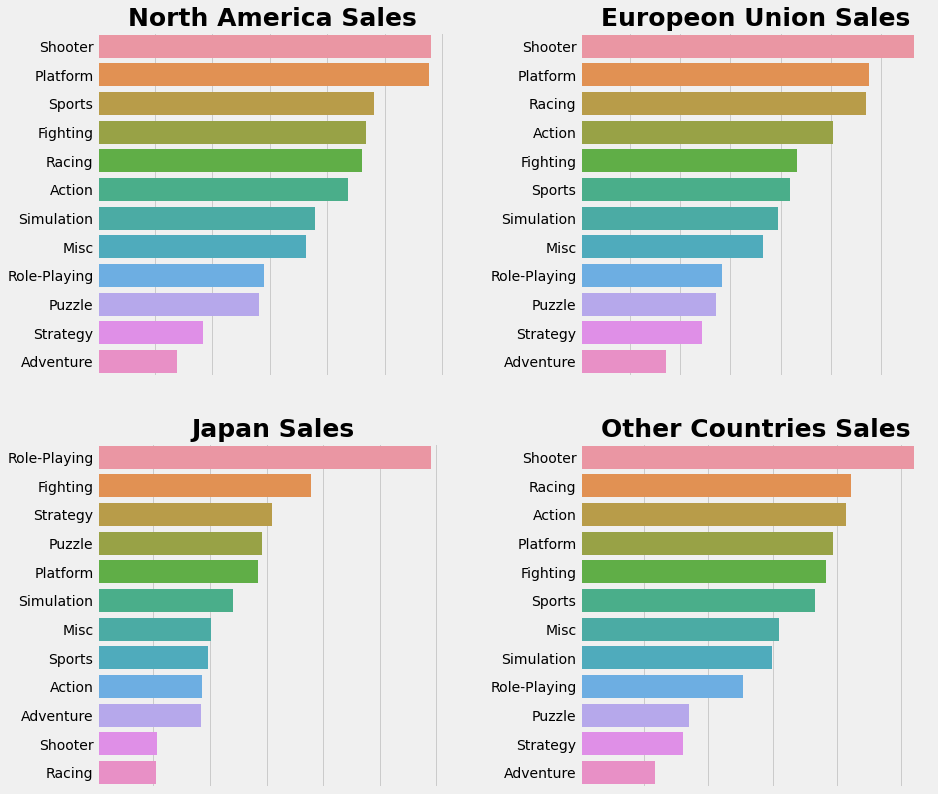

In [48]:
# 그렇다면 각 지역별로 장르선호도가 어떻게 다를까

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(14,12))
plt.subplot(221)
ax1 = sns.barplot(x=NA_Sales['NA_Sales'], y= NA_Sales['Genre'])
ax = plt.gca()
plt.title('North America Sales',fontsize=25, fontweight='semibold')
ax1.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(222)
ax2 = sns.barplot(x=EU_Sales['EU_Sales'], y= EU_Sales['Genre'])
plt.title('Europeon Union Sales',fontsize=25, fontweight='semibold')
ax2.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(223)
ax3 = sns.barplot(x=JP_Sales['JP_Sales'], y= JP_Sales['Genre'])
plt.title('Japan Sales',fontsize=25, fontweight='semibold')
ax3.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(224)
ax4 = sns.barplot(x=Other_Sales['Other_Sales'], y= Other_Sales['Genre'])
plt.title('Other Countries Sales',fontsize=25, fontweight='semibold')
ax4.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

fig.tight_layout(pad=3.0) #plot 간 간격설정
plt.show;

미국과 유럽, 기타국가들은 슈팅게임를 제일 선호하는 것으로 보이나 일본의 경우는 슈팅게임을 선호하지 않는다. 

다른나라들은 모두 비슷한 장르를 선호하는 것으로 보이나 일본의 경우는 다른 양상을 띈다. 

#연도별 게임 트랜드


*   제일 먼저 연도별 게임의 출시 현황을 살펴 본 다음, 연도별 선호 장르추이가 어떻게 변하는지 살펴보자



findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

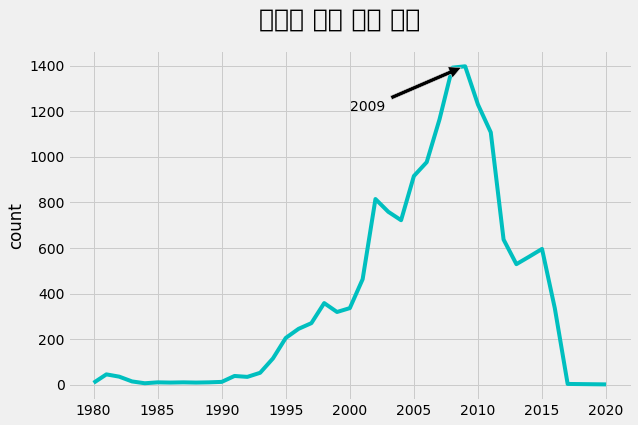

In [49]:
# 연도별 게임 출시 현황을 살펴 본 결과 2005~2011년 사이에 가장 많은 게임이 출시되었다.

release_by_year =df.groupby('Year',as_index=False)[['Name']].count()

#시각화로 살펴보자
from matplotlib import rc

plt.rc('font', family='NanumBarunGothic') 

fig = plt.figure(figsize=(9,6))
ax = sns.lineplot(x=release_by_year.Year ,y=release_by_year.Name, color='c')
ax.set(xlabel=None , ylabel='count')
plt.suptitle('연도별 게임 출시 현황',fontsize=25, fontweight='semibold')
ax.annotate("2009", xy=(2009, 1400), xytext=(2000, 1200),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show;



*  2005년~2015년 사이 가장 많은 게임이 출시되었다. 그렇다면 연도별 게임트랜드는 어떻게 변했을까.




In [50]:
sales_by_year = df.groupby(['Genre','Year'],as_index=False)['Global_Sales'].mean()

In [51]:
sales_by_year

,Genre,Year,Global_Sales
0,Action,1980,340.000000
1,Action,1981,591.600000
2,Action,1982,361.111111
3,Action,1983,408.571429
4,Action,1984,1850.000000
...,...,...,...
372,Strategy,2012,222.000000
373,Strategy,2013,332.631579
374,Strategy,2014,121.250000
375,Strategy,2015,107.058824


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

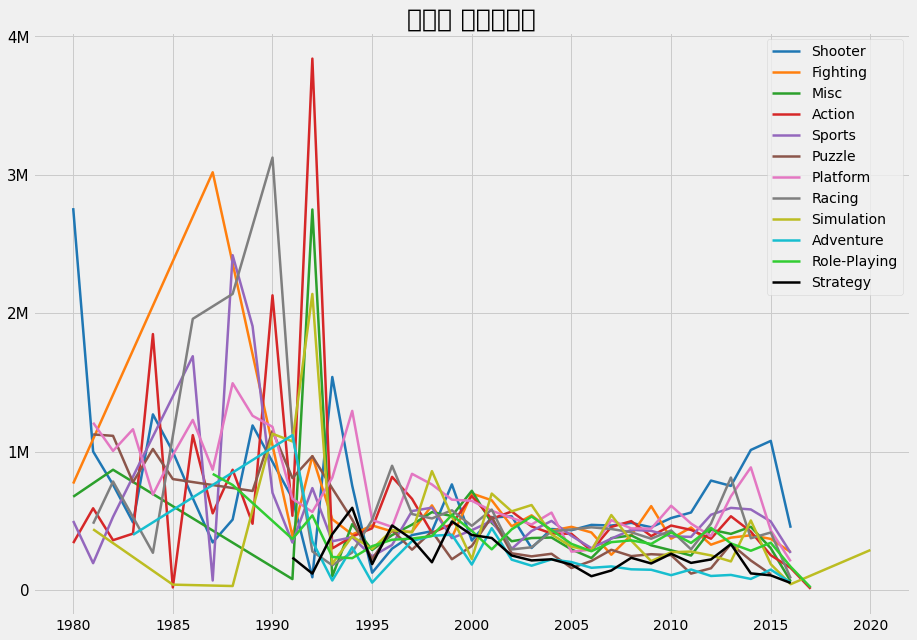

In [52]:

#장르별 총 판매량은 어떻게 변했는지 알아보자.
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14,10))
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

ax1= sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Shooter'").Global_Sales,linewidth=2.5,label='Shooter',color='#1f77b4')
ax2 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Fighting'").Global_Sales,linewidth=2.5,label='Fighting',color='#ff7f0e')
ax3 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Misc'").Global_Sales,linewidth=2.5,label='Misc',color='#2ca02c')
ax4 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Action'").Global_Sales,linewidth=2.5,label='Action',color='#d62728')
ax5 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Sports'").Global_Sales,linewidth=2.5,label='Sports',color='#9467bd')
ax6 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Puzzle'").Global_Sales,linewidth=2.5,label='Puzzle',color='#8c564b')
ax7 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Platform'").Global_Sales,linewidth=2.5,label='Platform',color='#e377c2')
ax8 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Racing'").Global_Sales,linewidth=2.5,label='Racing',color='#7f7f7f')
ax9 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Simulation'").Global_Sales,linewidth=2.5,label='Simulation',color='#bcbd22')
ax10 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Adventure'").Global_Sales,linewidth=2.5,label='Adventure',color='#17becf')
ax11 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Role-Playing'").Global_Sales,linewidth=2.5,label='Role-Playing',color='limegreen')
ax12 = sns.lineplot(x=sales_by_year.Year, y= sales_by_year.query("Genre=='Strategy'").Global_Sales,linewidth=2.5,label='Strategy',color='k')
ax.set_yticks([ 0,1000, 2000,3000, 4000])
ax.set_yticklabels(labels=['0','1M','2M','3M','4M'], fontsize=15)
plt.title('장르별 판매량변화',fontsize=25, fontweight='semibold')

ax.set(xlabel=None , ylabel=None)
plt.legend();



*   1980-1990년에는 Fighting , Racing 장르가 인기있었다.
*   1990-1995년에는 선호도가 Action, 기타장르(Misc)으로 옮겨갔다.
 
*   1995년이후로는 모든 게임이 사랑받다가, 2010년이후에 shooter 장르가 인기가 있었다. 


